In [1]:
import random
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_boston
from datetime import datetime
from datetime import timedelta
%matplotlib inline
# plt.matplotlib.rcParams.update({'font.size': 50})
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'   
plt.rcParams["patch.force_edgecolor"] = False
plt.rc('figure', titlesize=25)

In [2]:
conf_data = pd.read_csv('../augmented_datasets/tableau_conf_data.csv')
death_data = pd.read_csv('../augmented_datasets/tableau_death_data.csv')

In [8]:
conf_data.sort_values('Date')

,Unnamed: 0,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,...,avg_RH,avg_wind,avg_precip,avg_m_tmp,avg_m_RH,avg_m_wind,avg_m_precip,max_date,growth_factor,max_cases
12759,12759,2/14/2020,Fiji,0,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,-17.7134,...,77,17.2,0.00,26.844737,85.473684,5.871053,0.000000,3/22/2020,1.000000,2.0
15350,15350,2/14/2020,China,Inner Mongolia,Confirmed,65,4,3/23/2020 8:00:09 AM,3/22/2020,44.0935,...,55,24.9,0.00,-0.426316,47.868421,12.402632,0.000000,2/23/2020,1.000000,75.0
14597,14597,2/14/2020,Pakistan,0,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,30.3753,...,58,2.6,0.00,19.357895,68.421053,6.842105,0.000000,3/22/2020,1.269251,776.0
15908,15908,2/14/2020,China,Beijing,Confirmed,372,6,3/23/2020 8:00:09 AM,3/22/2020,40.1824,...,84,14.8,0.00,5.231579,49.973684,11.631579,0.000000,3/22/2020,1.023169,514.0
10083,10083,2/14/2020,India,0,Confirmed,3,0,3/23/2020 8:00:09 AM,3/22/2020,21.0000,...,48,5.8,0.00,24.650000,52.157895,5.271053,0.000000,3/22/2020,1.262242,396.0
6776,6776,2/14/2020,US,Washington,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,47.6477,...,87,12.7,0.25,3.813158,83.210526,9.184211,1.042632,3/05/2020,1.000000,0.0
5553,5553,2/14/2020,US,South Carolina,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,34.8606,...,42,10.3,0.00,10.821429,66.892857,7.325000,1.668571,3/09/2020,1.000000,1.0
14606,14606,2/14/2020,Oman,0,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,21.0000,...,40,19.9,0.00,22.826316,67.894737,16.460526,0.000000,3/22/2020,1.089744,55.0
11758,11758,2/14/2020,Montenegro,0,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,42.5000,...,81,10.2,0.00,10.663158,61.315789,10.539474,0.000000,3/22/2020,2.140695,21.0
2996,2996,2/14/2020,US,Kentucky,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,38.4333,...,67,10.8,0.00,5.900000,72.684211,15.089474,3.388421,3/09/2020,1.000000,2.0



Death cases max_cases correaltion Pearson
Cases            0.999995
Difference       0.854931
avg_wind         0.074313
Long             0.067427
Lat              0.063744
growth_factor    0.030954
avg_RH           0.026782
Unnamed: 0       0.019409
avg_tmp         -0.000570
avg_m_RH        -0.014980
avg_m_tmp       -0.019967
avg_precip      -0.033760
avg_m_wind      -0.053240
avg_m_precip    -0.060771
dtype: float64

Death cases max_cases correaltion Spearman
Cases            0.912620
growth_factor    0.667735
Difference       0.609644
Lat              0.208153
avg_m_RH         0.080111
Long             0.048278
Unnamed: 0       0.015495
avg_precip      -0.026353
avg_m_wind      -0.029692
avg_wind        -0.049419
avg_RH          -0.066142
avg_m_precip    -0.082325
avg_tmp         -0.164779
avg_m_tmp       -0.169469
dtype: float64

Confirmed cases max_cases correaltion Pearson
Cases            0.999954
Difference       0.696918
Long             0.104040
Unnamed: 0       0.088213
Lat 

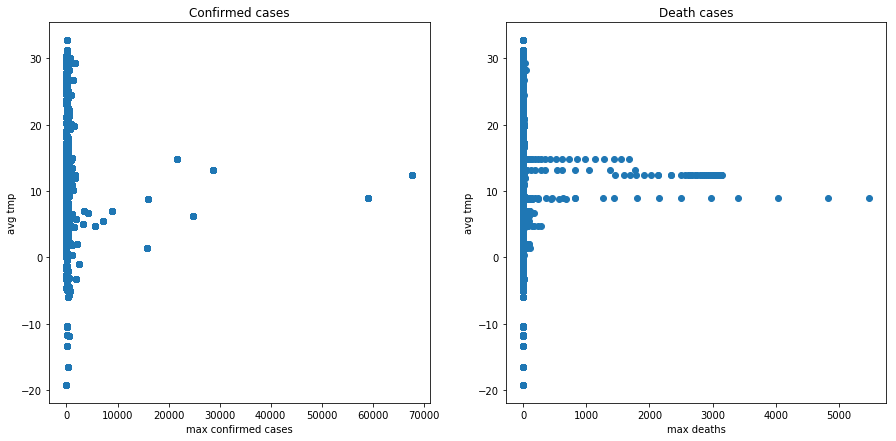

In [4]:
############################################################################
# CORRELATIONS AND SCATTER PLOTS AVG TMP VS MAX CASES CONFIRMED AND DEATHS #
############################################################################

TMP_RATE = 1
deaths = death_data[death_data['Date'] == '3/22/2020'][death_data['max_cases'].astype(int) > 0]
confs = conf_data[conf_data['Date'] == '3/22/2020'][conf_data['max_cases'].astype(int) > 0]

deaths['avg_m_tmp'] = deaths['avg_m_tmp'] * TMP_RATE
confs['avg_m_tmp'] = confs['avg_m_tmp'] * TMP_RATE

death_corrs = deaths.corr().unstack().sort_values(kind="quicksort", ascending=False)
death_corrs = death_corrs[death_corrs != 1]
_ = death_corrs.drop_duplicates()
print('\nDeath cases max_cases correaltion Pearson')
print(death_corrs['max_cases'])

death_corrs = deaths.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
death_corrs = death_corrs[death_corrs != 1]
_ = death_corrs.drop_duplicates()
print('\nDeath cases max_cases correaltion Spearman')
print(death_corrs['max_cases'])

conf_corrs = confs.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs = conf_corrs[conf_corrs != 1]
_ = conf_corrs.drop_duplicates()
print('\nConfirmed cases max_cases correaltion Pearson')
print(conf_corrs['max_cases'])

conf_corrs = confs.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs = conf_corrs[conf_corrs != 1]
_ = conf_corrs.drop_duplicates()
print('\nConfirmed cases max_cases correaltion Spearman')
print(conf_corrs['max_cases'])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
_ = axes[0].scatter(conf_data['max_cases'], conf_data['avg_m_tmp'])
_ = axes[1].scatter(death_data['Cases'], death_data['avg_m_tmp'])
_ = axes[0].set_xlabel('max confirmed cases')
_ = axes[0].set_ylabel('avg tmp')
_ = axes[0].set_title('Confirmed cases')
_ = axes[1].set_xlabel('max deaths')
_ = axes[1].set_ylabel('avg tmp')
_ = axes[1].set_title('Death cases')

###### Non perfect correlations between max_cases and cases result from instances where the amount of cases on the 23.3 was smaller then the maximal, as shown on the next block

In [ ]:
test = confs.drop(confs[confs['Cases'] < confs['max_cases']].index)
test_corrs = test.corr().unstack().sort_values(kind="quicksort", ascending=False)
# test_corrs = test_corrs[test_corrs != 1]
_ = test_corrs.drop_duplicates()
print('\nDeath cases max_cases correaltion Pearson')
print(test_corrs['max_cases'])


Confirmed cases growth_rate correaltion Pearson
avg_m_precip    0.297637
avg_precip      0.130394
avg_RH          0.098053
Difference      0.059634
avg_m_RH        0.029771
avg_m_wind     -0.005156
avg_m_tmp      -0.012796
Lat            -0.026151
Unnamed: 0     -0.033470
avg_wind       -0.039720
Cases          -0.075358
max_cases      -0.075795
avg_tmp        -0.118059
Long           -0.404631
dtype: float64

Confirmed cases growth_rate correaltion Spearman
Difference      0.424957
avg_m_precip    0.346413
avg_precip      0.254514
Cases           0.098864
max_cases       0.090571
avg_RH          0.087269
Lat             0.028086
avg_m_wind      0.019723
Unnamed: 0     -0.004550
avg_wind       -0.008663
avg_m_RH       -0.013192
avg_m_tmp      -0.040365
avg_tmp        -0.139438
Long           -0.455052
dtype: float64

Death cases growth_rate correaltion Pearson
avg_m_RH        0.149706
Difference      0.113017
avg_precip      0.097454
Lat             0.088736
avg_m_precip    0.074761
a

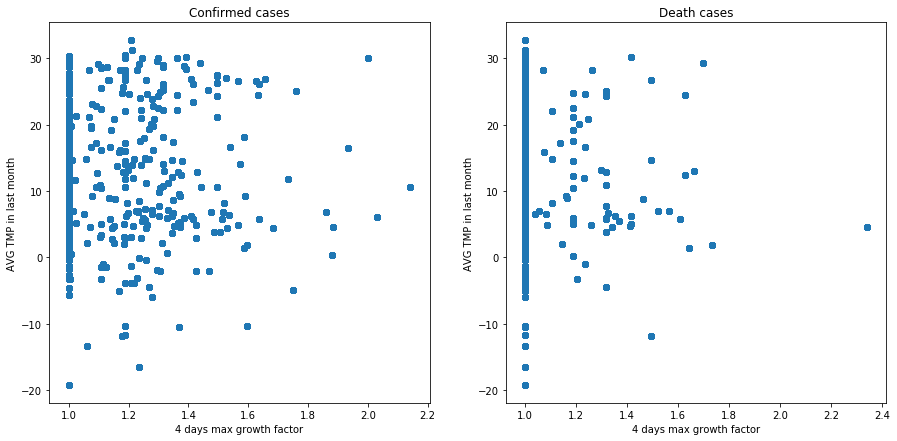

In [3]:
################################################################################
# CORRELATIONS AND SCATTER PLOTS AVG TMP VS GROWTH FACTOR CONFIRMED AND DEATHS #
################################################################################

TMP_RATE = 1
confs = conf_data[conf_data['Date'] == '3/22/2020'][conf_data['Cases'].astype(int) > 0]
deaths = death_data[death_data['Date'] == '3/22/2020'][death_data['max_cases'].astype(int) > 0]
confs['avg_m_tmp'] = confs['avg_m_tmp'] * TMP_RATE
deaths['avg_m_tmp'] = deaths['avg_m_tmp'] * TMP_RATE

conf_corrs_p = confs.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_p = conf_corrs_p[conf_corrs_p != 1]
_ = conf_corrs_p.drop_duplicates()
print('\nConfirmed cases growth_rate correaltion Pearson')
print(conf_corrs_p['growth_factor'])

conf_corrs_s = confs.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_s = conf_corrs_s[conf_corrs_s != 1]
_ = conf_corrs_s.drop_duplicates()
print('\nConfirmed cases growth_rate correaltion Spearman')
print(conf_corrs_s['growth_factor'])

death_corrs_p = deaths.corr().unstack().sort_values(kind="quicksort", ascending=False)
death_corrs_p = death_corrs_p[death_corrs_p != 1]
_ = death_corrs_p.drop_duplicates()
print('\nDeath cases growth_rate correaltion Pearson')
print(death_corrs_p['growth_factor'])

death_corrs_s = deaths.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
death_corrs_s = death_corrs_s[death_corrs_s != 1]
_ = death_corrs_s.drop_duplicates()
print('\nDeath cases growth_rate correaltion Spearman')
print(death_corrs_s['growth_factor'])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
_ = axes[0].scatter(conf_data[conf_data['growth_factor'].astype(int) > 0]['growth_factor'],\
                    conf_data[conf_data['growth_factor'].astype(int) > 0]['avg_m_tmp'])

_ = axes[1].scatter(death_data[death_data['growth_factor'].astype(int) > 0]['growth_factor'],\
                    death_data[death_data['growth_factor'].astype(int) > 0]['avg_m_tmp'])

_ = axes[0].set_xlabel('4 days max growth factor')
_ = axes[0].set_ylabel('AVG TMP in last month')
_ = axes[0].set_title('Confirmed cases')
_ = axes[1].set_xlabel('4 days max growth factor')
_ = axes[1].set_ylabel('AVG TMP in last month')
_ = axes[1].set_title('Death cases')